# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


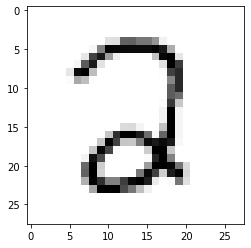

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.25836954982165705
train accuracy is: 0.5013353363378401, test accuracy is 0.5070564516129032


Epoch 10 Loss 0.14043650531326088
train accuracy is: 0.8941745952261726, test accuracy is 0.9032258064516129


Epoch 20 Loss 0.07477764868100578
train accuracy is: 0.9243031213486897, test accuracy is 0.9339717741935484


Epoch 30 Loss 0.05406921442287828
train accuracy is: 0.9402436988816558, test accuracy is 0.9511088709677419


Epoch 40 Loss 0.04461857348516799
train accuracy is: 0.9490903021198465, test accuracy is 0.9647177419354839


Epoch 50 Loss 0.039338324506798396
train accuracy is: 0.9545151059923218, test accuracy is 0.96875


Epoch 60 Loss 0.03592974029553253
train accuracy is: 0.958020363879152, test accuracy is 0.967741935483871


Epoch 70 Loss 0.033490056911601916
train accuracy is: 0.9607744950759473, test accuracy is 0.9692540322580645


Epoch 80 Loss 0.03163027255453585
train accuracy is: 0.9626105825404774, test accuracy is 0.969758064516129


Epoch 90 Loss 0.03014116686498209
train accuracy is: 0.9638624603572025, test accuracy is 0.9702620967741935


Epoch 100 Loss 0.02889651871182085
train accuracy is: 0.9656150893006176, test accuracy is 0.969758064516129


Epoch 110 Loss 0.027842466721689774
train accuracy is: 0.9667000500751126, test accuracy is 0.9712701612903226


Epoch 120 Loss 0.026922440138957462
train accuracy is: 0.9680353864129527, test accuracy is 0.9712701612903226


Epoch 130 Loss 0.02611137938066769
train accuracy is: 0.9682857619762978, test accuracy is 0.9712701612903226


Epoch 140 Loss 0.025385709734871864
train accuracy is: 0.9695376397930229, test accuracy is 0.9722782258064516


Epoch 150 Loss 0.02472423261877898
train accuracy is: 0.970372225004173, test accuracy is 0.9717741935483871


Epoch 160 Loss 0.024124903156327957
train accuracy is: 0.971791019863128, test accuracy is 0.9712701612903226


Epoch 170 Loss 0.023571295656737882
train accuracy is: 0.972375229510933, test accuracy is 0.9707661290322581


Epoch 180 Loss 0.023057511559738453
train accuracy is: 0.9730428976798531, test accuracy is 0.9707661290322581


Epoch 190 Loss 0.02257689168248322
train accuracy is: 0.9738774828910032, test accuracy is 0.9707661290322581


Epoch 200 Loss 0.022125574288754928
train accuracy is: 0.9744616925388082, test accuracy is 0.9712701612903226


Epoch 210 Loss 0.021685157950534693
train accuracy is: 0.9752128192288433, test accuracy is 0.9722782258064516


Epoch 220 Loss 0.021288715014284233
train accuracy is: 0.9756301118344183, test accuracy is 0.9722782258064516


Epoch 230 Loss 0.02089789269834746
train accuracy is: 0.9759639459188784, test accuracy is 0.9707661290322581


Epoch 240 Loss 0.02053944527333604
train accuracy is: 0.9763812385244534, test accuracy is 0.9717741935483871


0.0064200250425827925

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.24470047389105656
train accuracy is: 0.6801869470872977, test accuracy is 0.6794354838709677


Epoch 10 Loss 0.10210358201666232
train accuracy is: 0.9106993824069437, test accuracy is 0.9203629032258065


Epoch 20 Loss 0.07866807158898678
train accuracy is: 0.9262226673343348, test accuracy is 0.9354838709677419


Epoch 30 Loss 0.06789398030268953
train accuracy is: 0.9347354364880655, test accuracy is 0.9460685483870968


Epoch 40 Loss 0.06139999951787359
train accuracy is: 0.9404106159238859, test accuracy is 0.9490927419354839


Epoch 50 Loss 0.05696210595074915
train accuracy is: 0.9441662493740611, test accuracy is 0.9561491935483871


Epoch 60 Loss 0.0536949653655373
train accuracy is: 0.9466700050075113, test accuracy is 0.9581653225806451


Epoch 70 Loss 0.0511622112408306
train accuracy is: 0.9492572191620764, test accuracy is 0.9601814516129032


Epoch 80 Loss 0.04912847958393231
train accuracy is: 0.9505925554999165, test accuracy is 0.9621975806451613


Epoch 90 Loss 0.04745035984222144
train accuracy is: 0.9516775162744117, test accuracy is 0.9616935483870968


Epoch 100 Loss 0.04603418603793634
train accuracy is: 0.9530963111333667, test accuracy is 0.9621975806451613


Epoch 110 Loss 0.04481768623895144
train accuracy is: 0.9546820230345519, test accuracy is 0.9647177419354839


Epoch 120 Loss 0.0437602081574139
train accuracy is: 0.9551827741612419, test accuracy is 0.9647177419354839


Epoch 130 Loss 0.04282823940294954
train accuracy is: 0.9559339008512769, test accuracy is 0.9657258064516129


Epoch 140 Loss 0.04199856019726773
train accuracy is: 0.956434651977967, test accuracy is 0.9657258064516129


Epoch 150 Loss 0.04125433349627998
train accuracy is: 0.956601569020197, test accuracy is 0.9657258064516129


Epoch 160 Loss 0.04058149623218493
train accuracy is: 0.956935403104657, test accuracy is 0.9657258064516129


Epoch 170 Loss 0.03996862006435524
train accuracy is: 0.9578534468369221, test accuracy is 0.9657258064516129


Epoch 180 Loss 0.039407904630524425
train accuracy is: 0.958020363879152, test accuracy is 0.9657258064516129


Epoch 190 Loss 0.038892721887045976
train accuracy is: 0.9583541979636121, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.0384155344861841
train accuracy is: 0.9589384076114171, test accuracy is 0.9657258064516129


Epoch 210 Loss 0.03797295943498731
train accuracy is: 0.9591053246536472, test accuracy is 0.9662298387096774


Epoch 220 Loss 0.03756107903588795
train accuracy is: 0.9595226172592222, test accuracy is 0.9662298387096774


Epoch 230 Loss 0.037175374277347184
train accuracy is: 0.9596895343014522, test accuracy is 0.9662298387096774


Epoch 240 Loss 0.03681465109091136
train accuracy is: 0.9599399098647972, test accuracy is 0.9662298387096774


0.02034675934876453

### Comparing results of NN and LR

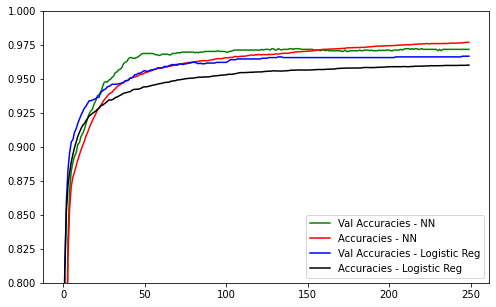

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

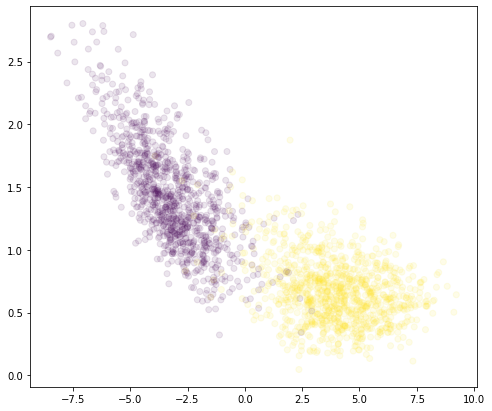

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

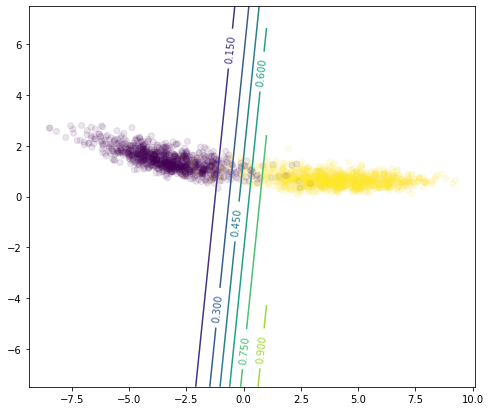

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );